EC9630 Machine Learning - Laboratory 02

Task: Linear Regression

Name: LOKUVITHANA S.M.

Reg No: 2021/E/138

Date: 27/02/2025

Time: 8.00 am

In [1]:
#Step 1: Download the 'Bike Sharing' data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip Bike-Sharing-Dataset.zip

--2025-02-28 01:19:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Bike-Sharing-Dataset.zip.1’

Bike-Sharing-Datase     [  <=>               ] 273.43K  1.09MB/s    in 0.2s    

2025-02-28 01:19:43 (1.09 MB/s) - ‘Bike-Sharing-Dataset.zip.1’ saved [279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [2]:
#Step 2: Read the data as a CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
# Read the day.csv file
df = pd.read_csv('day.csv')
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
#Step 3: Preprocessing steps
# Drop unnecessary columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# Split features and target
X = df.drop('cnt', axis=1)
y = df['cnt']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing completed.")

Preprocessing completed.


In [4]:
#Step 4: Fit linear regression model and calculate errors
# Fit linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 583.0197588300683
Mean Squared Error: 634351.361524894
Root Mean Squared Error: 796.4617765623747


In [5]:
#Step 5: Compare actual target value with predicted value
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

     Actual    Predicted
703    6606  5922.206323
33     1550  1350.383612
300    3747  3508.157826
456    6041  4716.926645
633    7538  7412.436270
557    7264  6444.421742
39     1605   780.503037
356    2209  1756.975794
559    7499  6461.274888
514    5743  6895.010980


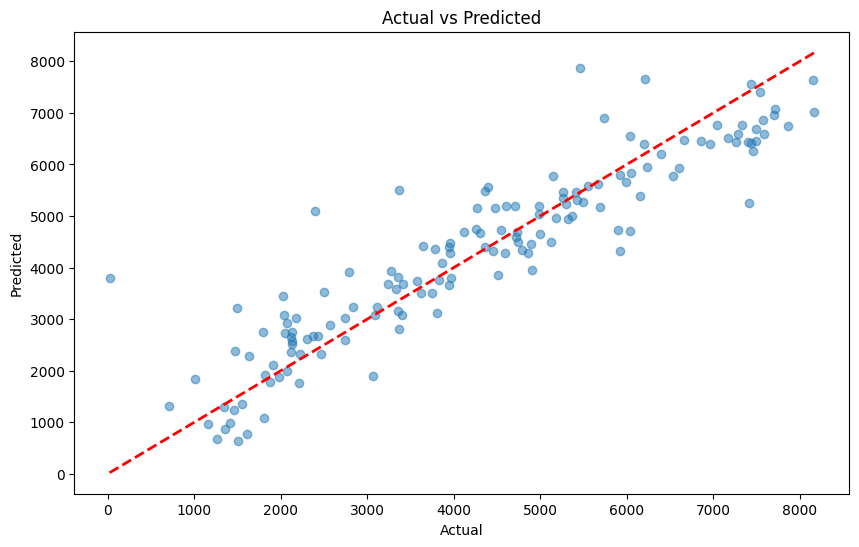

In [6]:
#Step 6: Plot actual value against predicted value
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [7]:
#Step 7: Implement L2 and L1 penalties (Regularization)
# L2 Regularization (Ridge)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

# L1 Regularization (Lasso)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
print(f"Ridge RMSE: {ridge_rmse}")
print(f"Lasso RMSE: {lasso_rmse}")

# Compare coefficients
coef_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Linear': model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_
})
print(coef_comparison)

Ridge RMSE: 795.6001509399018
Lasso RMSE: 795.9366673451952
         Feature      Linear       Ridge         Lasso
0           temp  686.298246  636.693636  6.886830e+02
1          atemp  195.466120  238.046790  1.935171e+02
2            hum -204.787259 -204.024985 -2.037258e+02
3      windspeed -198.408092 -196.852059 -1.972165e+02
4       season_1 -366.740499 -364.956663 -4.145738e+02
5       season_2   41.550846   42.029961  0.000000e+00
6       season_3  -16.588945  -16.199647 -6.118298e+01
7       season_4  341.201807  338.529492  2.887225e+02
8           yr_0 -495.168016 -495.058453 -9.894659e+02
9           yr_1  495.168016  495.058453  1.280651e-11
10        mnth_1  -61.759289  -65.483271 -5.109825e+01
11        mnth_2  -36.294895  -39.503114 -2.612336e+01
12        mnth_3   92.253933   90.077946  9.813106e+01
13        mnth_4   21.146983   19.941364  2.451963e+01
14        mnth_5   95.707473   96.094406  9.948054e+01
15        mnth_6   28.026216   30.151333  3.244390e+01
16   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.669e+07, tolerance: 2.141e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.669e+07, tolerance: 2.141e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.669e+07, tolerance: 2.141e

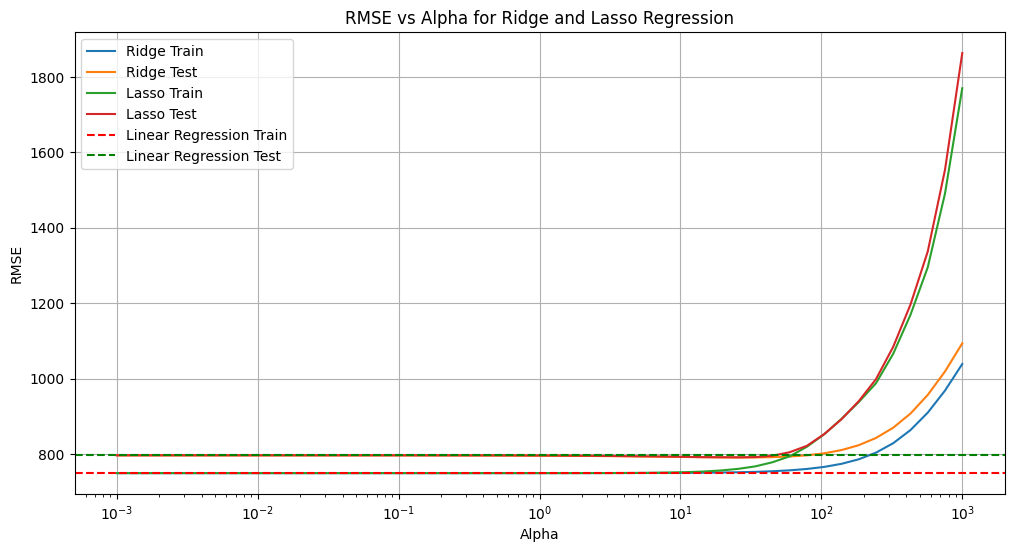

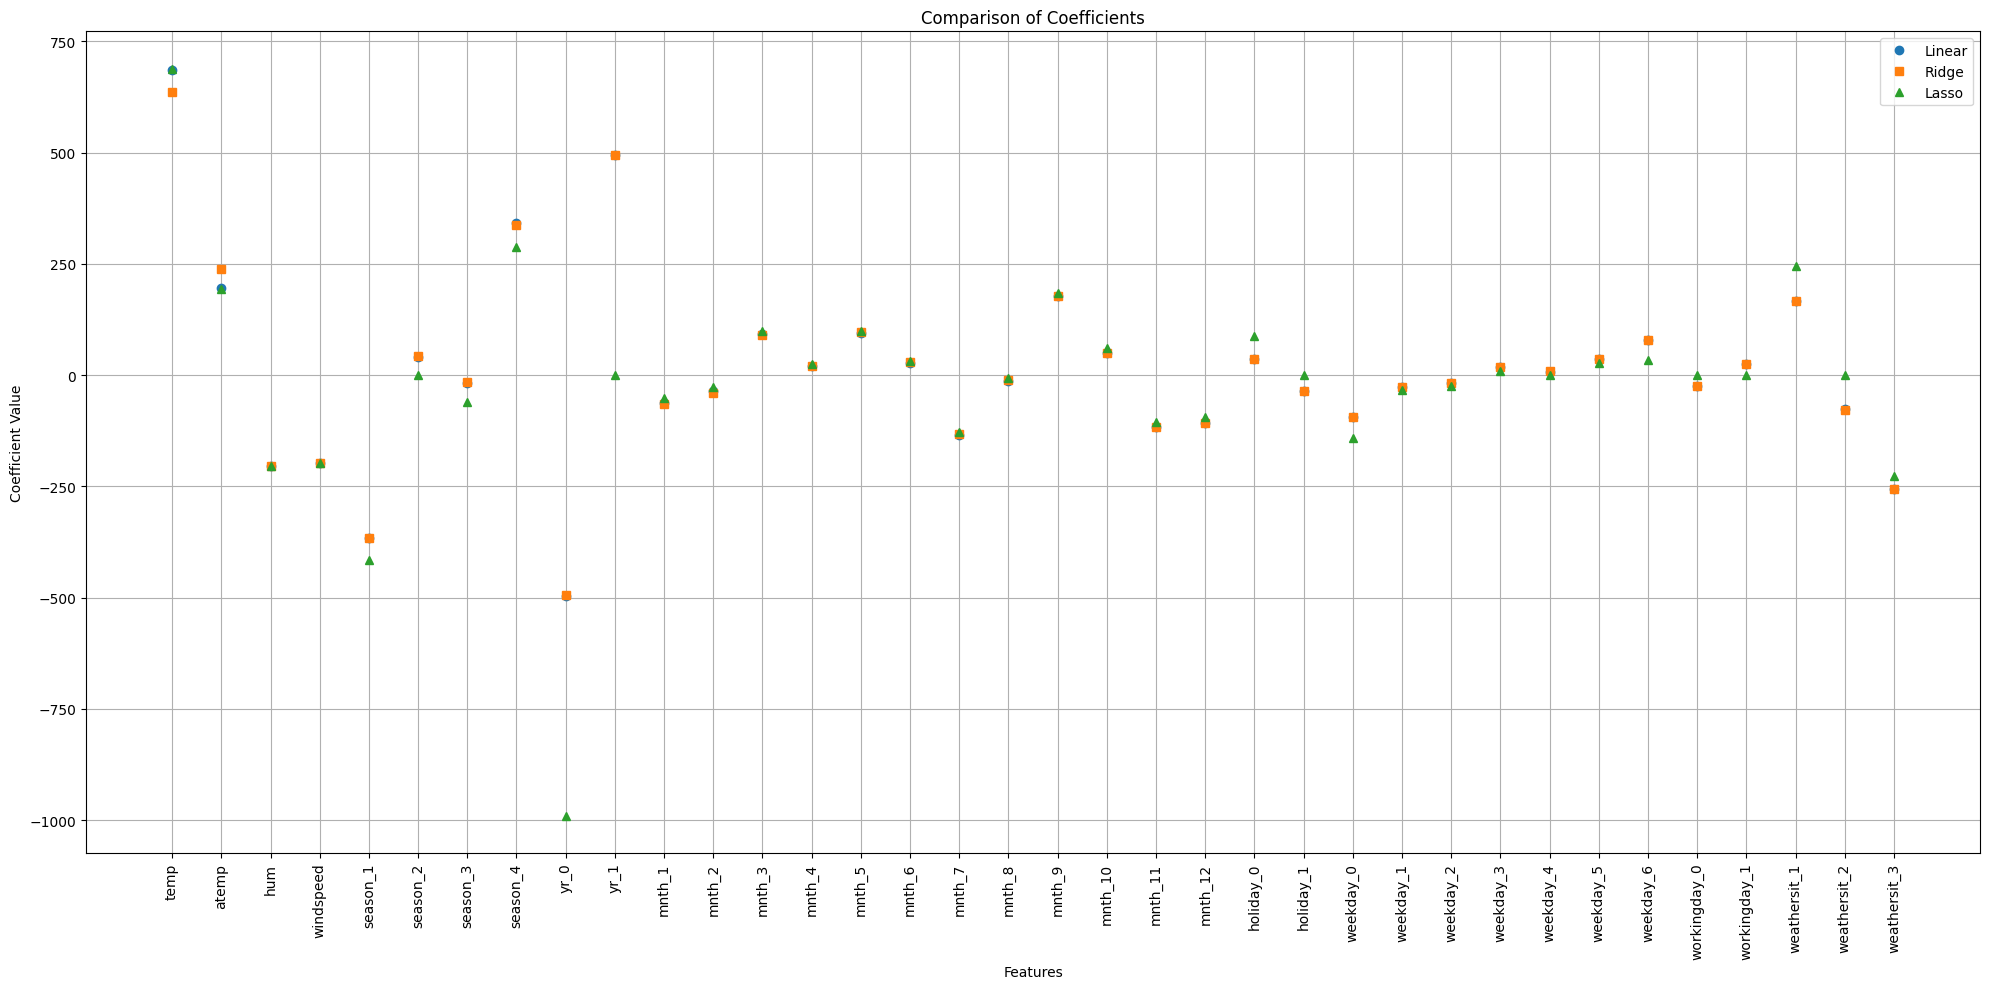


Top 10 most important features for Linear Regression:
         feature  importance
0           temp  686.298246
9           yr_1  495.168016
8           yr_0  495.168016
4       season_1  366.740499
7       season_4  341.201807
35  weathersit_3  255.888952
2            hum  204.787259
3      windspeed  198.408092
1          atemp  195.466120
18        mnth_9  177.526464

Top 10 most important features for Ridge Regression:
         feature  importance
0           temp  636.693636
9           yr_1  495.058453
8           yr_0  495.058453
4       season_1  364.956663
7       season_4  338.529492
35  weathersit_3  255.526308
1          atemp  238.046790
2            hum  204.024985
3      windspeed  196.852059
18        mnth_9  178.987103

Top 10 most important features for Lasso Regression:
         feature  importance
8           yr_0  989.465910
0           temp  688.682977
4       season_1  414.573765
7       season_4  288.722485
33  weathersit_1  245.073134
35  weathersit_3  227.382

In [8]:
#Step 8: Analyze the impact of regularization on model performance and coefficients.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming you've already loaded and preprocessed your data
# X_train_scaled, X_test_scaled, y_train, y_test should be available

# Function to get model performance
def get_model_performance(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    return train_rmse, test_rmse

# Range of alpha values for regularization
alphas = np.logspace(-3, 3, 50)

# Lists to store results
linear_train_rmse, linear_test_rmse = [], []
ridge_train_rmse, ridge_test_rmse = [], []
lasso_train_rmse, lasso_test_rmse = [], []

# Linear Regression (no regularization)
lr_model = LinearRegression()
lr_train_rmse, lr_test_rmse = get_model_performance(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Ridge and Lasso with different alpha values
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)
    ridge_train, ridge_test = get_model_performance(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test)
    lasso_train, lasso_test = get_model_performance(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test)
    ridge_train_rmse.append(ridge_train)
    ridge_test_rmse.append(ridge_test)
    lasso_train_rmse.append(lasso_train)
    lasso_test_rmse.append(lasso_test)

# Plot RMSE vs alpha for Ridge and Lasso
plt.figure(figsize=(12, 6))
plt.semilogx(alphas, ridge_train_rmse, label='Ridge Train')
plt.semilogx(alphas, ridge_test_rmse, label='Ridge Test')
plt.semilogx(alphas, lasso_train_rmse, label='Lasso Train')
plt.semilogx(alphas, lasso_test_rmse, label='Lasso Test')
plt.axhline(y=lr_train_rmse, color='r', linestyle='--', label='Linear Regression Train')
plt.axhline(y=lr_test_rmse, color='g', linestyle='--', label='Linear Regression Test')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha for Ridge and Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

# Analyze coefficients
def plot_coefficients(linear_coef, ridge_coef, lasso_coef, feature_names):
    plt.figure(figsize=(20, 10))
    plt.plot(range(len(feature_names)), linear_coef, 'o', label='Linear')
    plt.plot(range(len(feature_names)), ridge_coef, 's', label='Ridge')
    plt.plot(range(len(feature_names)), lasso_coef, '^', label='Lasso')
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title('Comparison of Coefficients')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Get coefficients for each model
linear_coef = lr_model.coef_
ridge_model = Ridge(alpha=1.0)  # You can choose the best alpha based on the previous graph
lasso_model = Lasso(alpha=1.0)  # You can choose the best alpha based on the previous graph
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
ridge_coef = ridge_model.coef_
lasso_coef = lasso_model.coef_
# Plot coefficients
plot_coefficients(linear_coef, ridge_coef, lasso_coef, X_train.columns)

# Print top 10 most important features for each model
def print_top_features(coef, feature_names, model_name):
    feat_importance = pd.DataFrame({'feature': feature_names, 'importance': np.abs(coef)})
    feat_importance = feat_importance.sort_values('importance', ascending=False).head(10)
    print(f"\nTop 10 most important features for {model_name}:")
    print(feat_importance)

print_top_features(linear_coef, X_train.columns, "Linear Regression")
print_top_features(ridge_coef, X_train.columns, "Ridge Regression")
print_top_features(lasso_coef, X_train.columns, "Lasso Regression")